# Assignment 4

# Question 1
Test the correlation of the age distribution of Male vs Female riders and of day vs night riders

In [33]:
import os
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [34]:
# In this case, we use the citibike data of February, 2015.
df=pd.read_csv('/Users/QCathy/Downloads/201502-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


 ## Male vs Female

In [35]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

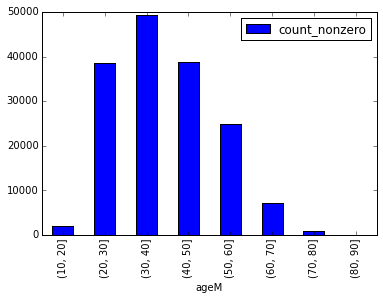

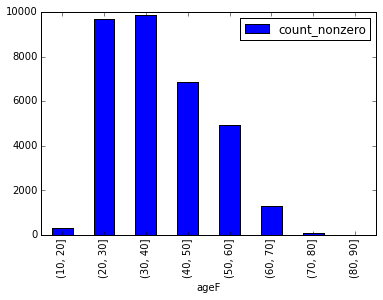

In [36]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageM                   
(10, 20]       0.002160
(20, 30]       0.052312
(30, 40]       0.044676
(40, 50]       0.012573
(50, 60]       0.008436
(60, 70]       0.003543
(70, 80]       0.000207
(80, 90]       0.000000


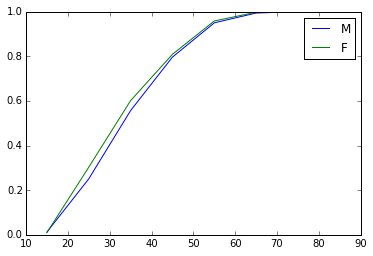

In [37]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [38]:
import scipy.stats

### K-S test

In [39]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)

In [40]:
print ks

Ks_2sampResult(statistic=0.65250088864063371, pvalue=0.0)


According to the result, as p-value=0.0<0.05, we can reject the null hypothesis that there is a relationship between the distribution of man riders' and woman riders' age.

### Pearson's test

In [41]:
df.cleanageF=df.ageF.dropna()
df.cleanageM=df.ageM.dropna()
print len(df.cleanageF)
print len(df.cleanageM)

33064
161561


In [42]:
df.cleanageM1 = np.random.choice(df.cleanageM,len(df.cleanageF),replace=False)
print len(df.cleanageM1)

33064


In [43]:
print scipy.stats.pearsonr(df.cleanageM1, df.cleanageF)

(-0.010592262514651412, 0.054101100279659385)


P-value=0.204 is larger than 0.05, we reject the null hypothesis that there is a relationship between the distribution of man riders' and woman riders' age.

### Spearman's test

In [44]:
print scipy.stats.spearmanr(df.cleanageM1, df.cleanageF)

SpearmanrResult(correlation=-0.0069000218124215485, pvalue=0.20961180469208707)


P-value=0.2248 is larger than 0.05, we reject the null hypothesis that there is a relationship between the distribution of man riders' and woman riders' age.

## Day vs Night

In the case, we define that daytime is from 6am to 17pm, and night time is from 17pm to 6pm the next day.

In [45]:
df = pd.read_csv('/Users/QCathy/Downloads/201502-citibike-tripdata.csv')

In [46]:
df['date'] = pd.to_datetime(df['starttime'])

In [47]:
df['ageD'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour<17)\
                                   & (df['date'].dt.hour>=6)]
df['ageN'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour>=17)\
                                   |(df['date'].dt.hour<6)]

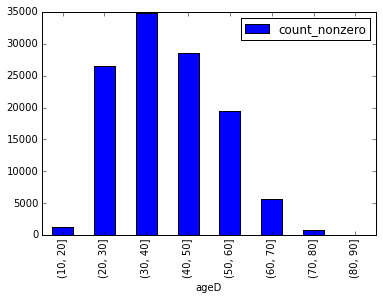

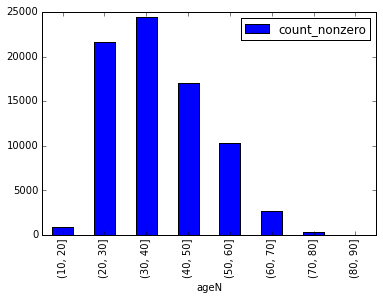

In [48]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
ageD                   
(10, 20]       0.005584
(20, 30]       0.069737
(30, 40]       0.204338
(40, 50]       0.351826
(50, 60]       0.469520
(60, 70]       0.508518
(70, 80]       0.514620
(80, 90]       0.514865


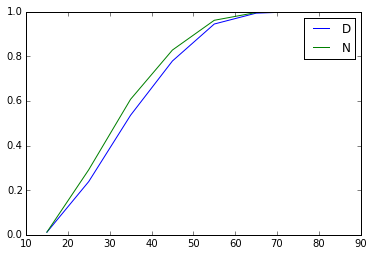

In [50]:
csD = df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).cumsum()

csN = df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).cumsum()

print np.abs(csD / csN.max()-csN / csN.max())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.legend()

In [51]:
import scipy.stats

### K-S test

In [52]:
ks = scipy.stats.ks_2samp(df.ageD, df.ageN)

In [53]:
print ks

Ks_2sampResult(statistic=0.20236124511247655, pvalue=0.0)


According to the result, as p-value=0.0<0.05, we can reject the null hypothesis that there is a relationship between the distribution of day riders' and night riders' age.

### Pearson's test

In [54]:
df.cleanageD=df.ageD.dropna()
df.cleanageN=df.ageN.dropna()
print len(df.cleanageD)
print len(df.cleanageN)

117256
77407


In [55]:
df.cleanageD1 = np.random.choice(df.cleanageD,len(df.cleanageN),replace=False)
print len(df.cleanageD1)

77407


In [56]:
print scipy.stats.pearsonr(df.cleanageD1, df.cleanageN)

(-0.0027000454266937601, 0.45253293711962606)


P-value=0.4525 is larger than 0.05, we reject the null hypothesis that there is a relationship between the distribution of day riders' and night riders' age.

### Spearman's test

In [57]:
print scipy.stats.spearmanr(df.cleanageD1, df.cleanageN)

SpearmanrResult(correlation=-0.0019206111694346785, pvalue=0.59310183774967895)


P-value=0.5931 is larger than 0.05, we reject the null hypothesis that there is a relationship between the distribution of day riders' and night riders' age.